In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [34]:
train = pd.read_csv('../data/raw/train.csv')

In [35]:
test  = pd.read_csv('../data/raw/test.csv')

In [36]:
train.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [37]:
train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

#  Preprocessing

In [38]:
class Hw:
    def __init__(self, train: pd.DataFrame, test: pd.DataFrame):
        self.train = train
        self.test = test
        
    def apply(self, fun_name: str, *args, **kwargs):
        self.train = self.train.__getattribute__(fun_name)(*args, **kwargs)
        self.test = self.test.__getattribute__(fun_name)(*args, **kwargs)

    def get(self, fun_name: str, *args, **kwargs):
        if fun_name == '[]':
            return self.train[args[0]]
        return self.train.__getattribute__(fun_name)(*args, **kwargs)

    def set(self, fun_name: str, *args, **kwargs):
        if fun_name == '[]':
            self.train[args[0]] = args[1]
            self.test[args[0]] = args[1]
        

In [39]:
def get_date_time_features(timestamp_series: pd.Series) -> pd.DataFrame:
    
    timestamp_series = pd.to_datetime(timestamp_series)
    
    output= pd.DataFrame()
    output['timestamp']= timestamp_series
    output['month'] = timestamp_series.dt.month.astype(np.int8) 
    output['day_week'] = timestamp_series.dt.dayofweek.astype(np.int8)
    output['day_month_datetime'] =timestamp_series.dt.day.astype(np.int8)
    output['year'] = timestamp_series.dt.year.astype(np.int16)
    output['min'] = timestamp_series.dt.strftime("%M").astype(int)/1_000_000_000_000
    # output['seconds'] = timestamp_series.view(int)/1_000_000_000_000
    
    return output

In [40]:
hw = Hw(train, test)

In [41]:
hw.apply('fillna',0)

In [42]:
hw.train['timestamp'] = pd.to_datetime(hw.train['timestamp'])
hw.test['timestamp'] = pd.to_datetime(hw.test['timestamp'])

In [43]:
hw.train = pd.concat( [hw.train, get_date_time_features(hw.train['timestamp'])] , axis=1 )

In [44]:
hw.train['product_type'] = hw.train['product_type'].replace({'Investment': 1, 'OwnerOccupier': 0})
hw.test['product_type'] = hw.test['product_type'].replace({'Investment': 1, 'OwnerOccupier': 0})

In [45]:
corelation = hw.get('corr')

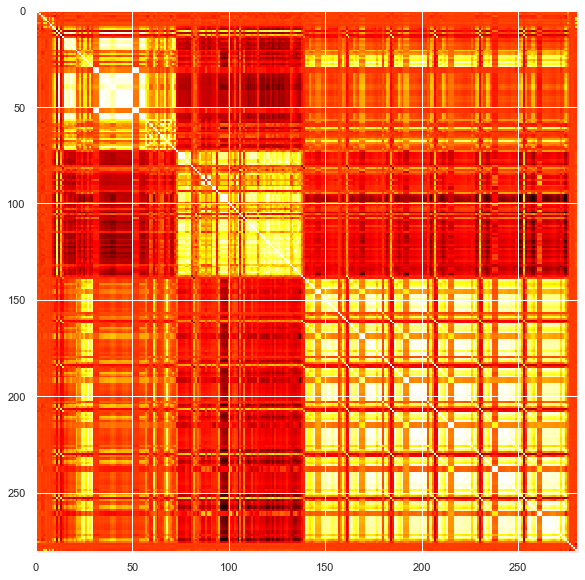

In [46]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(corelation,cmap='hot',interpolation='nearest')


In [47]:
corelation = corelation.where(corelation < 1.0)
corelation = corelation.unstack().dropna()

In [48]:
corelation.unstack().sort_values(by='metro_km_walk', ascending=False)['metro_km_walk'][:20]

metro_min_walk                1.000000
metro_km_avto                 0.986680
metro_min_avto                0.938636
radiation_km                  0.911397
park_km                       0.905139
power_transmission_line_km    0.894516
ts_km                         0.887625
exhibition_km                 0.878652
basketball_km                 0.874476
thermal_power_plant_km        0.873590
big_church_km                 0.811429
ttk_km                        0.810792
stadium_km                    0.796684
sadovoe_km                    0.789221
bulvar_ring_km                0.780651
bus_terminal_avto_km          0.780630
kremlin_km                    0.780449
swim_pool_km                  0.770650
school_km                     0.765231
preschool_km                  0.764409
Name: metro_km_walk, dtype: float64

In [49]:
hw.get('[]', 'life_sq')

0        27.0
1        19.0
2        29.0
3        50.0
4        77.0
         ... 
30466    27.0
30467    59.0
30468     0.0
30469    32.0
30470    28.0
Name: life_sq, Length: 30471, dtype: float64

In [50]:
hw.set('[]', 'price_per_sq_meter', hw.get('[]', 'price_doc')/ (hw.get('[]', 'full_sq')+1))
hw.set('[]', 'life_part', hw.get('[]', 'life_sq')/ (hw.get('[]', 'full_sq')+1))
hw.set('[]', 'kitchen_part', hw.get('[]', 'kitch_sq')/ (hw.get('[]', 'full_sq')+1))

In [51]:
train = hw.train

# 1 Cross validation

In [52]:
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import SGDRegressor

In [53]:
def find_cross_validation(data, features: list, target: str):

    msle_list = []
    mse_list = []
    count = 1

    # kf = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    kf = KFold(n_splits=5, shuffle = True)
    for train_index, val_index in kf.split(data):
        train_part = train.loc[train_index, : ]
        val_part = train.loc[val_index,:  ]
        model = SGDRegressor()
        model.fit( X=train_part[features].fillna(0), y = train_part[target] )
        val_prediction = model.predict( val_part[features].fillna(0) ).clip( 0, 1000000000)
        
        
        mse = mean_squared_error(val_prediction,  val_part[target]  )
        msle = mean_squared_log_error(val_prediction,  val_part[target]  )
        
        
        msle_list.append(msle)
        mse_list.append(mse)
        print( f'Fold {count}: msle {msle} , mse {mse}')
        count += 1
    

    
    print( f'MSLE average = {np.mean(msle_list)} , std ={np.std(msle_list)}  '  )
    return model

# 2.1

In [54]:
features_1 = ['metro_km_walk', 'kremlin_km', 'full_sq']
target = 'price_per_sq_meter'

model_1 = find_cross_validation(hw.train, features_1, target)

Fold 1: msle 0.43998732284087544 , mse 9670060825.325344
Fold 2: msle 89.21628471858023 , mse 8.147998499343412e+17
Fold 3: msle 6.712576588694917 , mse 24390167433.70963
Fold 4: msle 0.2997780676569481 , mse 27392870464.609177
Fold 5: msle 12.604779820517203 , mse 20380296087.80083
MSLE average = 21.854681303658033 , std =33.987152275768544  


# 2.2

In [55]:
features_2 = ['metro_km_walk', 'kremlin_km', 'full_sq']
target = 'price_per_sq_meter'

hw.set('[]', 'metro_km_walk', (hw.get('[]', 'metro_km_walk') - (hw.get('[]', 'metro_km_walk').mean()) / hw.get('[]','metro_km_walk').std()))
hw.set('[]', 'kremlin_km', (hw.get('[]', 'kremlin_km') - (hw.get('[]', 'kremlin_km').mean()) / hw.get('[]','kremlin_km').std()))
hw.set('[]', 'full_sq', (hw.get('[]', 'full_sq') - (hw.get('[]', 'full_sq').mean()) / hw.get('[]','full_sq').std()))

model_2 = find_cross_validation(hw.train, features_2, target)

Fold 1: msle 7.380070817536839 , mse 38246825552.233185
Fold 2: msle 4.235519781671009 , mse 404613427042.7359
Fold 3: msle 64.88886655456194 , mse 1.2303324754157454e+17
Fold 4: msle 0.8420682144192833 , mse 44034860790.31971
Fold 5: msle 86.57709793915849 , mse 8.747080120466444e+17
MSLE average = 32.78472466146951 , std =35.791289964546046  


# 2.3

In [56]:
features_3 = ['product_type', 'state','material','num_room','kremlin_km','metro_km_walk']
target = 'price_per_sq_meter'

hw.set('[]', 'product_type', (hw.get('[]', 'product_type') - (hw.get('[]', 'product_type').mean()) / hw.get('[]','product_type').std()))
hw.set('[]', 'state', (hw.get('[]', 'state') - (hw.get('[]', 'state').mean()) / hw.get('[]','state').std()))
hw.set('[]', 'material', (hw.get('[]', 'material') - (hw.get('[]', 'material').mean()) / hw.get('[]','material').std()))
hw.set('[]', 'num_room', (hw.get('[]', 'num_room') - (hw.get('[]', 'num_room').mean()) / hw.get('[]','num_room').std()))

model_3 = find_cross_validation(hw.train, features_3, target)

Fold 1: msle 0.2755850392618423 , mse 23335428114.907818
Fold 2: msle 0.288427630893214 , mse 22762593982.58257
Fold 3: msle 3.94573683405523 , mse 22630018229.379025
Fold 4: msle 0.9426772549252544 , mse 56835513465.43738
Fold 5: msle 0.9991498913940714 , mse 17425272670.02127
MSLE average = 1.2903153301059225 , std =1.3631103721006772  


# 2.4

In [57]:
features_4 = ['product_type', 'state','material','num_room','kremlin_km','metro_km_walk','build_year', 'min']
target = 'price_per_sq_meter'

hw.set('[]', 'build_year', (hw.get('[]', 'build_year') - (hw.get('[]', 'build_year').mean()) / hw.get('[]','build_year').std()))
hw.set('[]', 'min', (hw.get('[]', 'min') - (hw.get('[]', 'min').mean()) / hw.get('[]','min').std()))

model_4 = find_cross_validation(hw.train, features_4, target)

Fold 1: msle 113.39163119169322 , mse 4.59280219178962e+17


C:\Users\SCOTTM~1\AppData\Local\Temp/ipykernel_2556/3448044505.py:5: RuntimeWarning: invalid value encountered in double_scalars
  hw.set('[]', 'min', (hw.get('[]', 'min') - (hw.get('[]', 'min').mean()) / hw.get('[]','min').std()))


Fold 2: msle 103.67748524559197 , mse 5.723626010688474e+17
Fold 3: msle 93.84435966481044 , mse 7.389512891276175e+17
Fold 4: msle 135.88879865666965 , mse 1.0423623116890956e+16
Fold 5: msle 127.25748715691071 , mse 1.87353512291465e+17
MSLE average = 114.8119523831352 , std =15.262754664665833  


# 2.5

In [58]:
features_5 = ['product_type', 'state','material','num_room','kremlin_km','metro_km_walk','build_year', 'min']
target = 'log_price_per_sq_meter'


hw.set('[]', 'log_price_per_sq_meter', np.log1p(hw.get('[]', 'price_per_sq_meter')))

model_5 = find_cross_validation(hw.train, features_5, target)

Fold 1: msle 181.7796679071079 , mse 5.410992489892678e+17
Fold 2: msle 325.2006605219986 , mse 9.823557399844659e+17
Fold 3: msle 93.17819606228616 , mse 2.6698391248026493e+17
Fold 4: msle 97.64446064210354 , mse 2.8109615362856742e+17
Fold 5: msle 186.18167095435163 , mse 5.548079948269403e+17
MSLE average = 176.79693121756958 , std =84.13533662317647  


# 3

In [59]:
def write_test(data, model, feature, count):
    test_prediction = model.predict(data[feature].fillna(0))
    sample_submission = pd.read_csv('../data/raw/sample_submission.csv')
    sample_submission['price_doc'] = test_prediction
    sample_submission['price_doc'] *= data['full_sq']
    sample_submission['price_doc'] = sample_submission['price_doc'].clip(1, 10**9)
    sample_submission.to_csv(f'model{count}.csv', index=False)

In [60]:
def write_test_log(data, model, feature, count):
    test_prediction = model.predict(data[feature].fillna(0))
    sample_submission = pd.read_csv('../data/raw/sample_submission.csv')
    sample_submission['price_doc'] = np.e**test_prediction - 1
    sample_submission['price_doc'] *= test['full_sq']
    sample_submission['price_doc'] = sample_submission['price_doc'].clip(1, 10**9)
    sample_submission.to_csv(f'model{count}.csv', index=False)

In [61]:
hw.test.loc[:, 'metro_km_walk'] = (hw.test['metro_km_walk'] - hw.test['metro_km_walk'].mean()) / hw.test['metro_km_walk'].std()
hw.test.loc[:, 'kremlin_km'] = (hw.test['kremlin_km'] - hw.test['kremlin_km'].mean()) / hw.test['kremlin_km'].std()
hw.test.loc[:, 'state'] = (hw.test['state'] - hw.test['state'].mean()) / hw.test['state'].std()
hw.test.loc[:, 'material'] = (hw.test['material'] - hw.test['material'].mean()) / hw.test['material'].std()
hw.test.loc[:, 'min'] = (hw.test['min'] - hw.test['min'].mean()) / hw.test['min'].std()
hw.test.loc[:, 'build_year'] = (hw.test['build_year'] - hw.test['build_year'].mean()) / hw.test['build_year'].std()

In [62]:
write_test(hw.test, model_1, features_1, 1)
write_test(hw.test, model_2, features_2, 2)
write_test(hw.test, model_3, features_3, 3)
write_test(hw.test, model_4, features_4, 4)
write_test_log(hw.test, model_5, features_5, 5)

C:\Users\SCOTTM~1\AppData\Local\Temp/ipykernel_2556/2407169672.py:4: RuntimeWarning: overflow encountered in power
  sample_submission['price_doc'] = np.e**test_prediction - 1


# 4

Unable to submit models to Kaggle, via phone number issue

<img src="https://i.imgur.com/1TKzK3j.png" width="400" height="500">

<img src="https://i.imgur.com/PpUwrwr.png" width="600" height="100">